## The Sparks Foundation - DS and BA Internship - #GRIPFeb21

### Task 6 - Prediction using Decision Tree    

- From the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly

In [1]:
#Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # for visual representation of model output

from sklearn.model_selection import train_test_split  # to split the data as train and test data sets
from sklearn import metrics # for calculating the accuracy of the model
from sklearn.metrics import confusion_matrix # for understanding the miscalculations in class
from sklearn.tree import DecisionTreeClassifier # for training the model using Decision tree Classifier
from sklearn import tree # for visual representation of model output in a tree structure

### 1. Understanding the dataset

- The data contains flower Sepal and Petal dimensions and the species to which the flower belongs to (target variable).
- There are 150 entries and 4 features.

In [2]:
# Creating a dataframe from the inbulit dataset iris
df = pd.read_csv(r"F:\Sparks Foundation\Tasks\Task 6 - Prediction using Decision Tree\Iris.csv")

### 2.  Feature Selection

- The independent features which can be used in training are SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm.
- There are no Null values; no need of imputation or deletion of data.

In [3]:
#viewing the dataset
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.shape

(150, 6)

The dependent feature, which is the target variable, is the **species** to which the flower belongs to

### 3. Model Building

### Trial Models
- Model building & training using Decision Tree Algorithm for this classification and understanding the algorithm
- Spliting the dataset into Training & Testing data and observe the accuracy of the model.
- Decision Tree algorithms generally have a problem of overfitting with training data.
- Decision Tree Algorithm uses various criterions to measure the homogeneity of a node.Criterion 'gini' is used by default.

In [6]:
#Splitting the dataset into train and test sets : Using 70:30
X = df.drop(['Species','Id'], axis=1)
y = df['Species']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [7]:
#Checking the distribution in the training dataset
y = pd.Series(y)
y.value_counts(normalize=True)

Iris-versicolor    0.333333
Iris-virginica     0.333333
Iris-setosa        0.333333
Name: Species, dtype: float64

**Model 1 :-**

In [8]:
#Training the Model with default parameters
dtree_clf1=DecisionTreeClassifier()
dtree_clf1.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

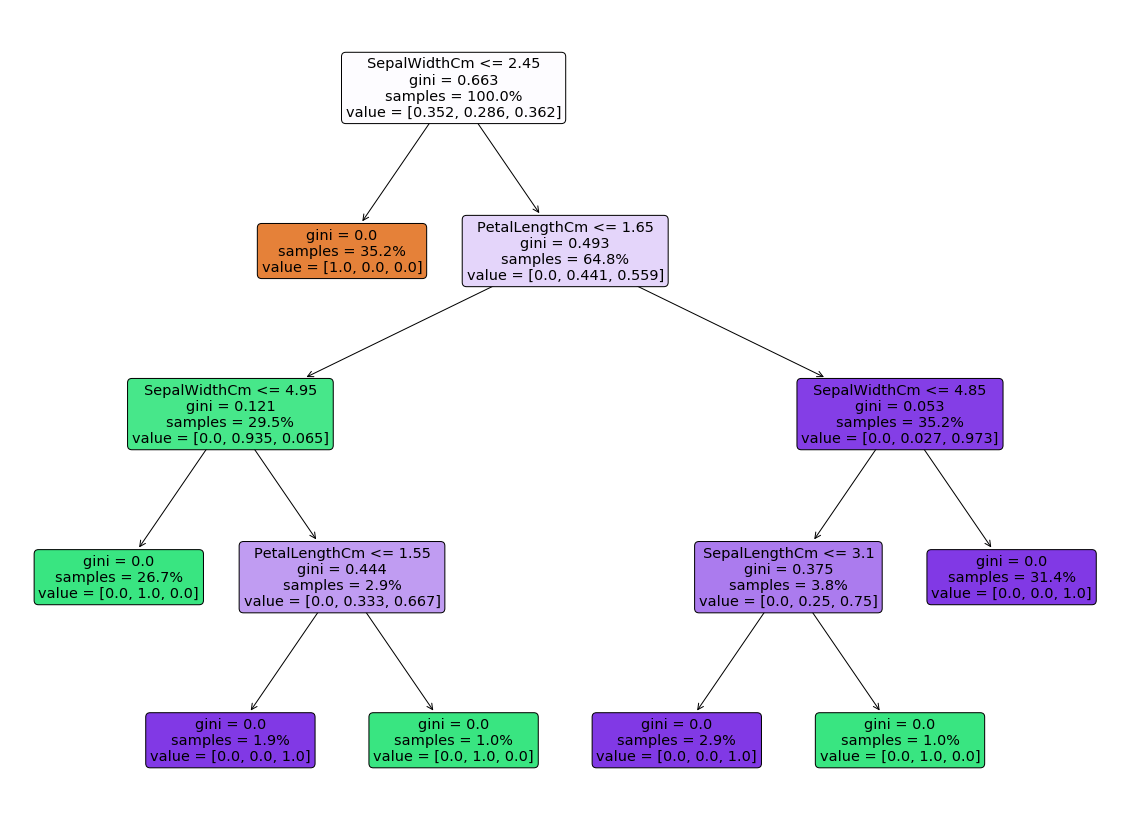

In [9]:
#Visual representation of model output in a tree structure
plt.figure(figsize=(20,15))
columns_list = df.columns.values
tree.plot_tree(dtree_clf1,feature_names=columns_list,filled=True,precision=3,proportion=True,rounded=True)
plt.show()

**The above tree has a depth of 4, 5 decision nodes and 7 leaf nodes.**

In [10]:
#Prediction
y_pred1=dtree_clf1.predict(x_test)

In [11]:
#Accuracy score of model with training data
dtree_clf1.score(x_train,y_train)

1.0

In [12]:
#Accuracy score of model with test data
dtree_clf1.score(x_test,y_test)

0.9555555555555556

**The accuracy score is 100% with the training dataset and in case of testing it is only 95.56%. This shows the overfitting problem of Decision Tree Algorithm.**

In [13]:
#Confusion Matrix
cm=confusion_matrix(y_test,y_pred1)
cm

array([[13,  0,  0],
       [ 0, 19,  1],
       [ 0,  1, 11]], dtype=int64)

**From the confusion matrix, it can be observed that there exists 4 misclassifications in prediction.**

**Model 2 :-**

- Prunning the tree with parameters(max_depth,max_leaf_nodes) to reduce the difference in accuracy score of test and train.

In [14]:
#Training the Model with updated parameters
dtree_clf2=DecisionTreeClassifier(splitter='best',max_depth=4,max_leaf_nodes=7)
dtree_clf2.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

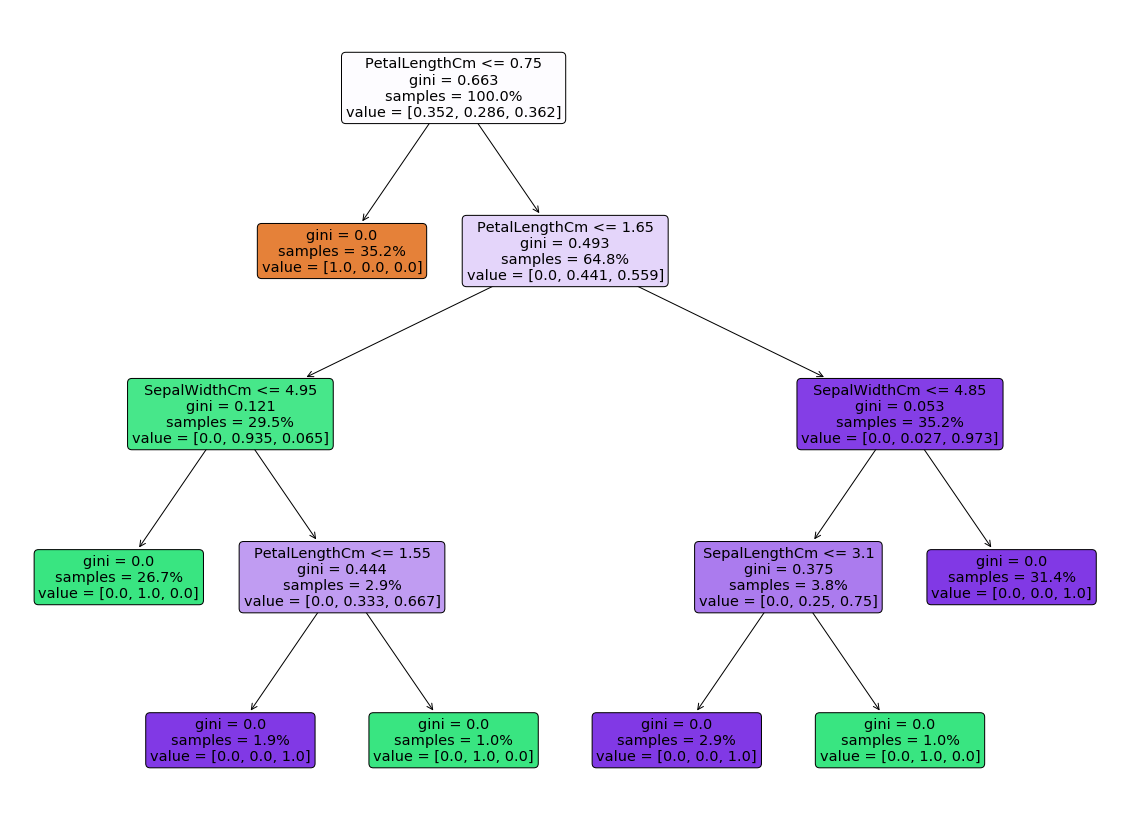

In [15]:
# Visual representation of model output in a tree structure
plt.figure(figsize=(20,15))
tree.plot_tree(dtree_clf2,feature_names=columns_list,filled=True,precision=3,proportion=True,rounded=True)
plt.show()

In [16]:
#Prediction
y_pred2=dtree_clf2.predict(x_test)

In [17]:
#Accuracy score of model with training data
dtree_clf2.score(x_train,y_train)

1.0

In [18]:
#Accuracy score of model with test data
dtree_clf1.score(x_test,y_test)

0.9555555555555556

In [19]:
#Confusion Matrix
cm=confusion_matrix(y_test,y_pred2)
cm

array([[13,  0,  0],
       [ 0, 19,  1],
       [ 0,  1, 11]], dtype=int64)

**The accuracy score is 100% with the training dataset and in case of testing it is only 95.56%. This shows the overfitting problem of Decision Tree Algorithm.**

**Final Model :-**

In [20]:
#Restricting the depth of the tree to 2 and maximum leaf nodes as 3
dtree_clf=DecisionTreeClassifier(splitter='best',max_depth=4,max_leaf_nodes=7)
dtree_clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [21]:
#Accuracy score of model with training data
dtree_clf.score(X,y)

0.9866666666666667

**The accuracy score of the model is 98.67% with the training dataset.**

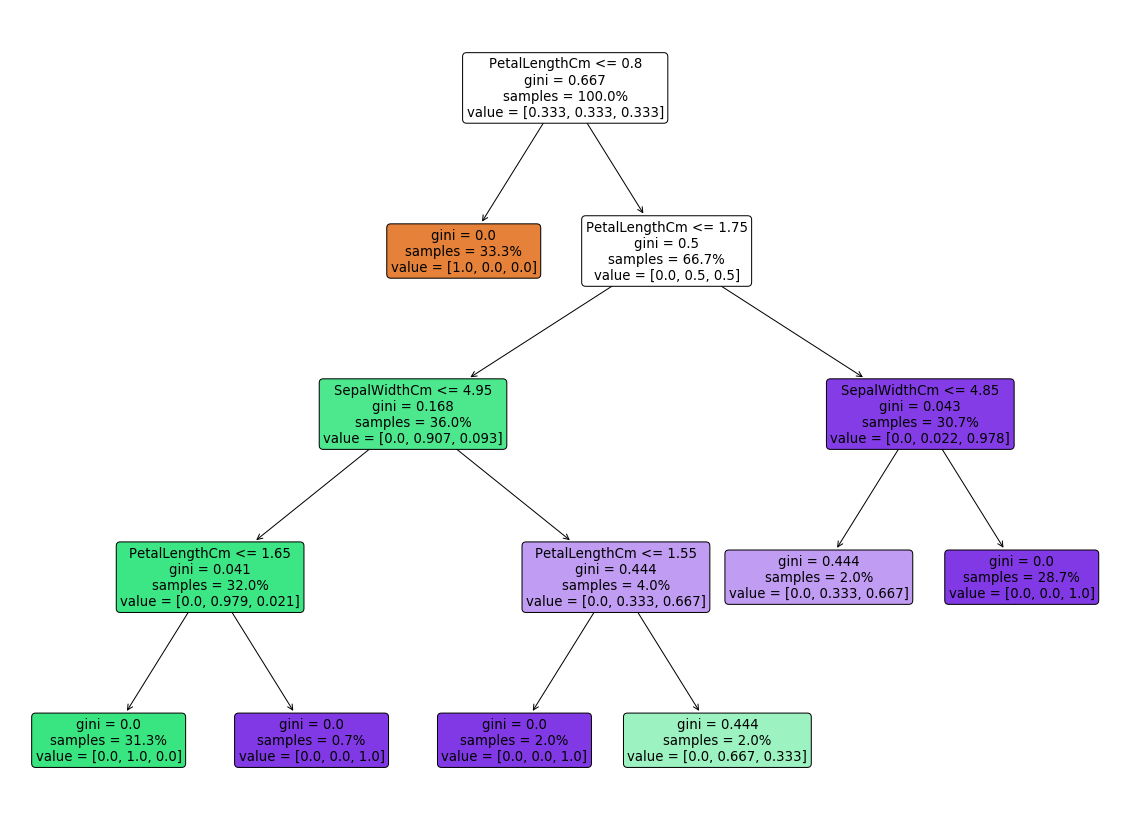

In [22]:
# Visual representation of final output in a tree structure
plt.figure(figsize=(20,15))
tree.plot_tree(dtree_clf,feature_names=columns_list,filled=True,precision=3,proportion=True,rounded=True)
plt.show()

### 4. Conclusion

- The Trial Models were built to understand the Decision Tree Algorithm.Overfitting problem with training data and eventually the misclassification was observed.Prunning led to decrease in difference in accuracy with train and test data.

- The Final model was built as per the probem statement and can be used for predicting the classifcation for new data.The parameters for prunning based on the results of trial models is chosen.The accuracy score of the model is 98.67% with the training dataset.

